In [1]:
import numpy as np
import pandas as pd
import pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
%matplotlib inline
mpl.rc('font',size=21,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
wd = '/Volumes/eSSD0/Papers/GRL_G1RF/data/'
compsets = ['F1850CN','piClim-abrupt-4xCO2','piClim-abrupt-SOLr','piClim-G1']

lat = np.linspace(-90,90,46)
lon = np.linspace(0,355,72)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat[:,None],(1,72))

data = {}
for i in range(len(compsets)):  
    data[compsets[i]] = np.nanmean(\
        pk.load(open(wd+'interpolated/F_'+compsets[i]+'_diag_grid_int.pi','rb'))['tas'],axis=0)
    
delta = {}
delta['sol'] = data['piClim-abrupt-SOLr']-data['F1850CN']
delta['x4'] = data['piClim-abrupt-4xCO2']-data['F1850CN']
delta['G1'] = data['piClim-G1']-data['F1850CN']
delta['G1L'] = delta['sol']+delta['x4']

gam = {}
delta_plot = {}
for sims in delta.keys():
    gam[sims] = np.average(delta[sims],weights=coslat)

    delta_plot[sims] = np.concatenate((delta[sims][:,36:],delta[sims][:,:36]),axis=1)
    delta_plot[sims],lon_cyc = add_cyclic_point(delta_plot[sims],lon)

In [4]:
labels = ['SOLAR','4xCO2','G1','G1L']
keynames = list(delta.keys())

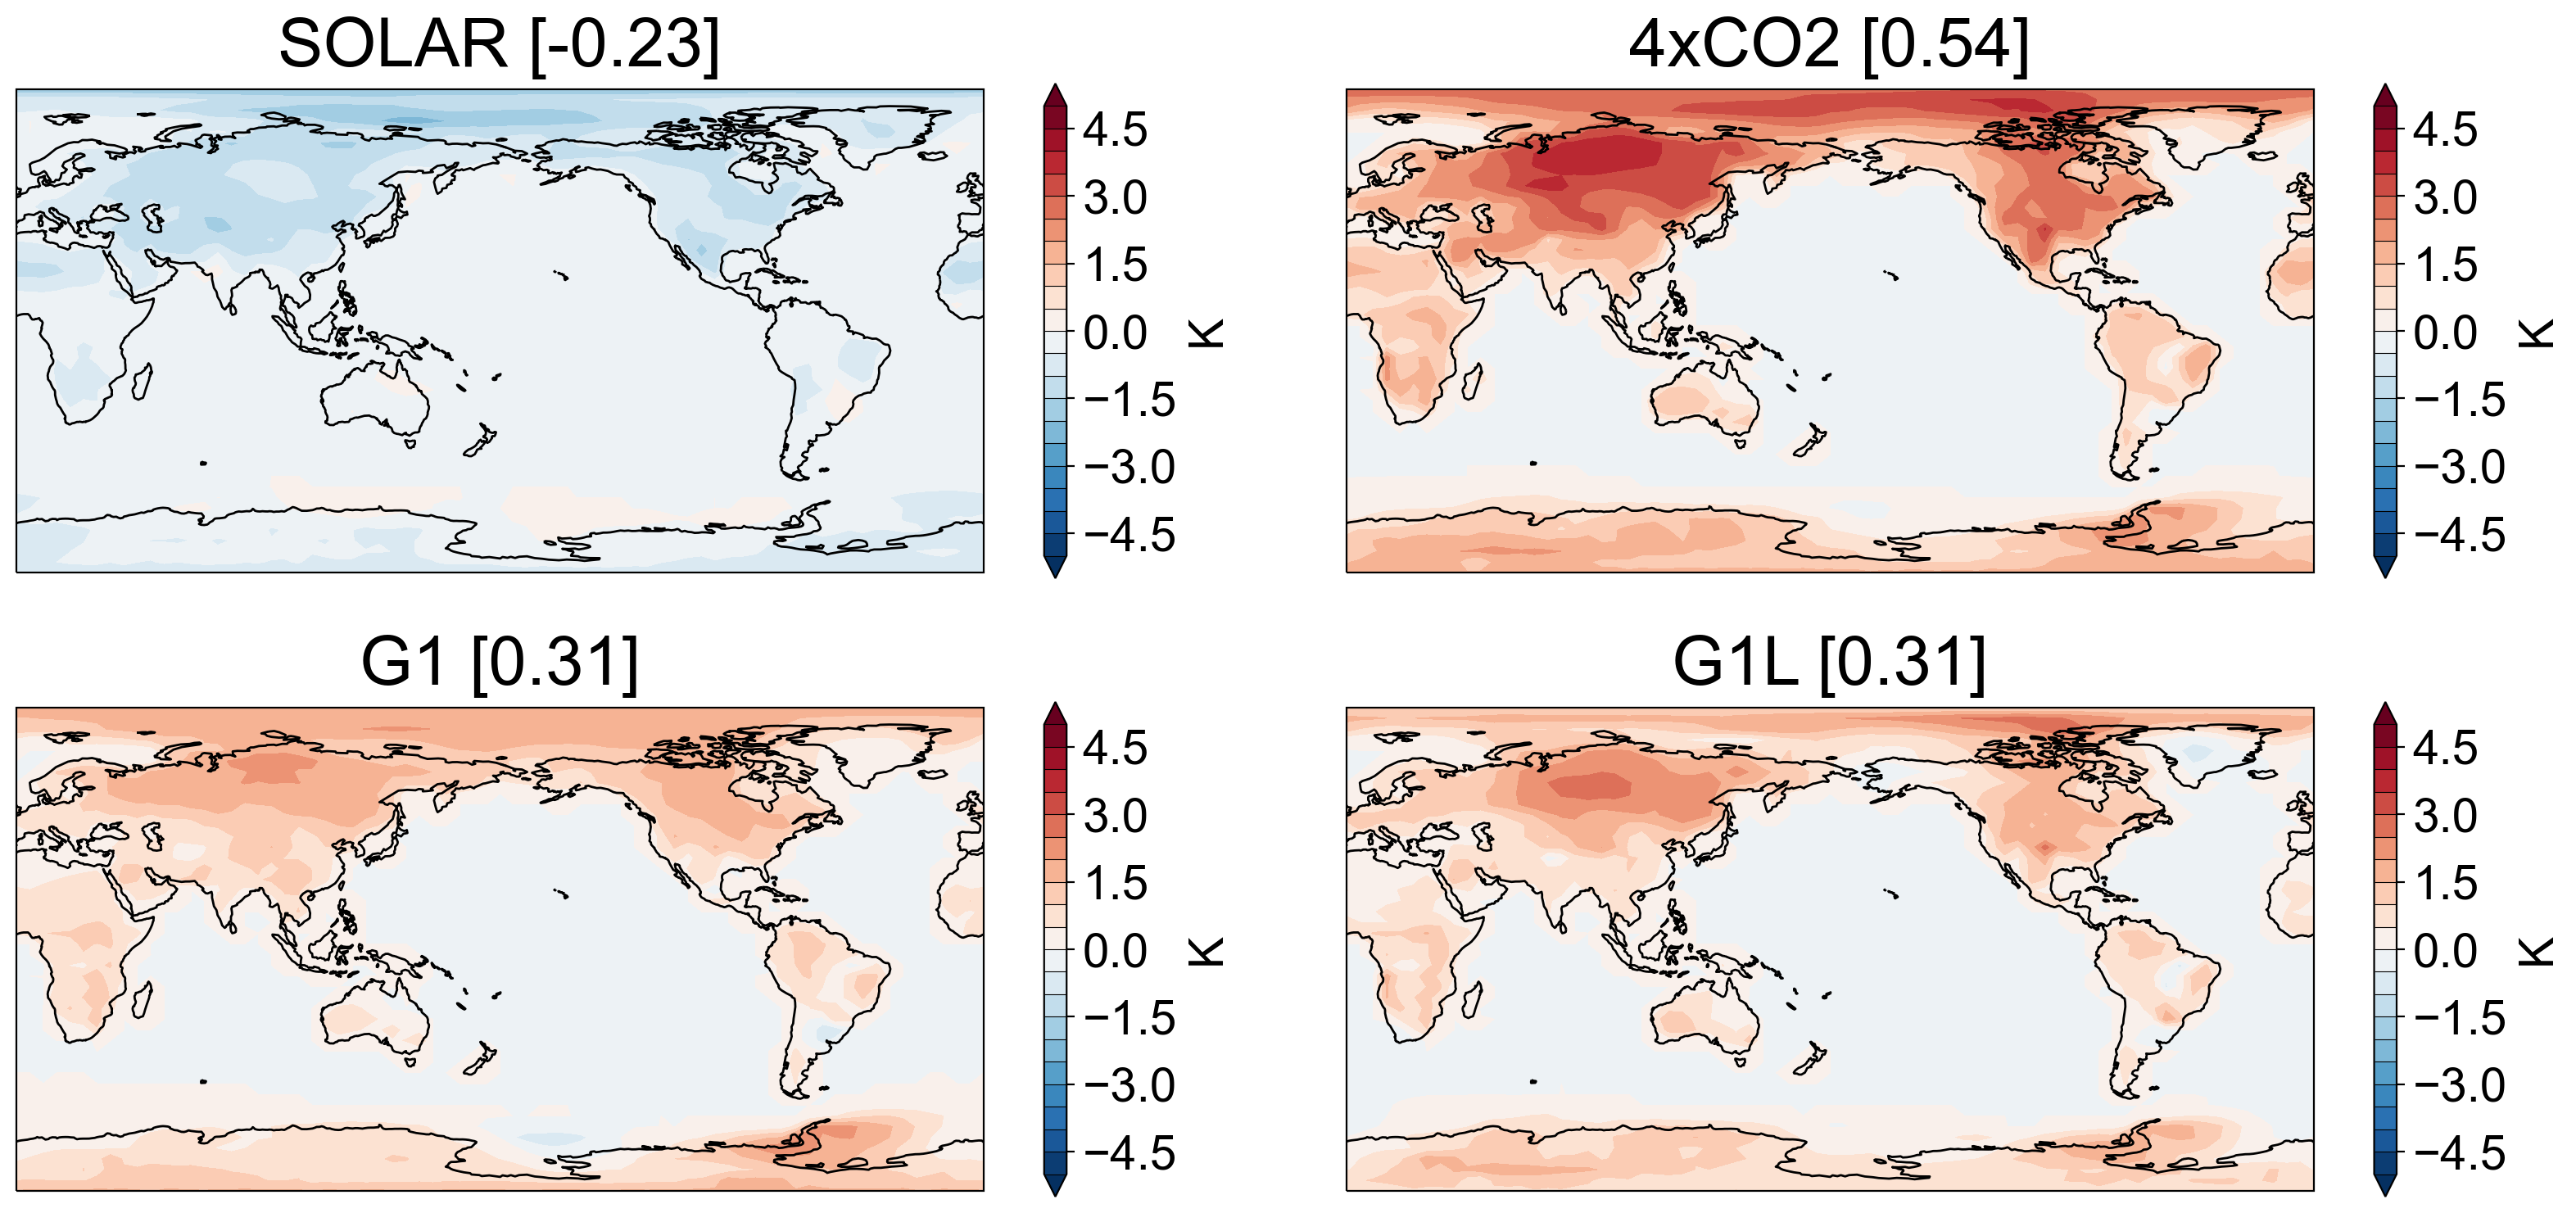

In [5]:
fig = plt.figure(figsize=(20,15),dpi=200)

for i in range(4):

    bounds = np.arange(-5,5.1,0.5)

    ax = plt.subplot(2,2,i+1,projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_title('{} [{}]'.format(labels[i],round(gam[keynames[i]],2)),fontsize=30,pad=10)
    ax.coastlines()
    cont = ax.contourf(lon_cyc,lat,delta_plot[keynames[i]],bounds,cmap=plt.cm.RdBu_r,extend='both')
    plt.colorbar(cont,drawedges=True,shrink=0.4,label='K')

plt.subplots_adjust(wspace=0.1,hspace=-0.5)

#plt.savefig('TAS_Map.png',bbox_inches='tight')

In [9]:
g1_sims = [delta_plot['G1'],delta_plot['G1L'],delta_plot['G1']-delta_plot['G1L']]
g1_gam = [gam['G1'],gam['G1L'],gam['G1']-gam['G1L']]
g1_labels = ['G1','G1L','Residual (G1 - G1L)']

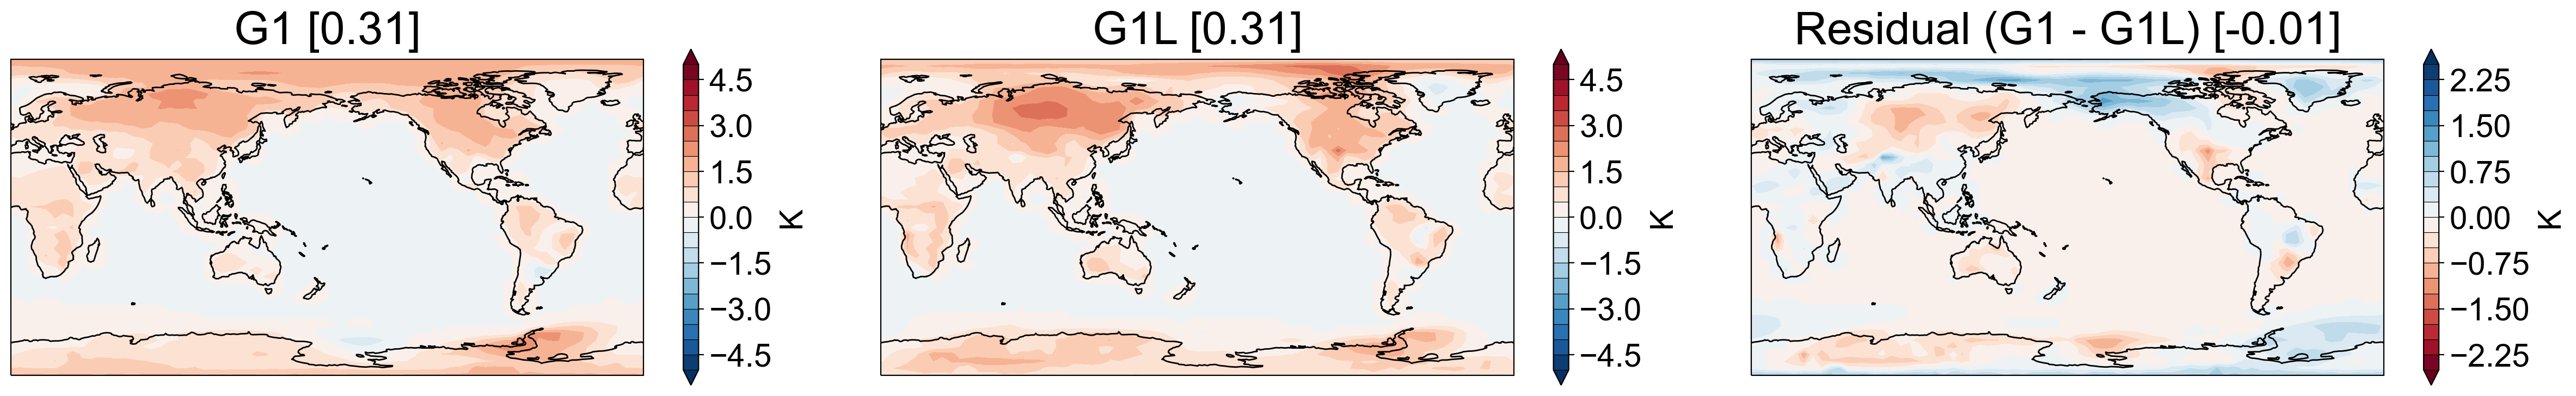

In [11]:
fig = plt.figure(figsize=(30,10),dpi=200)

for i in range(3):
    if i == 2:
        bounds = np.arange(-2.5,2.51,0.25)
        cmap = plt.cm.RdBu
    else:
        bounds = np.arange(-5,5.1,0.5)
        cmap = plt.cm.RdBu_r

    ax = plt.subplot(2,3,i+1,projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_title('{} [{}]'.format(g1_labels[i],round(g1_gam[i],2)),fontsize=30,pad=10)
    ax.coastlines()
    cont = ax.contourf(lon_cyc,lat,g1_sims[i],bounds,cmap=cmap,extend='both')
    plt.colorbar(cont,drawedges=True,shrink=0.9,label='K')

plt.subplots_adjust(wspace=0.1)

plt.savefig('TAS_G1_Map.png',bbox_inches='tight')